In [9]:
# only execute this when running on GPU Hub
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

In [11]:
file_location = "../data/cleaned/cleaned_data.parquet"
df = pd.read_parquet(file_location)
df.head()

,id,en,lat,lng
0,945902,Brant Goose,51.2115,3.2858
1,882013,Brant Goose,47.7981,-2.4738
2,862637,Brant Goose,48.6366,-4.2945
3,834740,Brant Goose,49.1144,-0.4023
4,787168,Brant Goose,49.1144,-0.4023


# Stratified splitting with validation

We use stratified splitting to improve generalization by ensure class distributions are similar across train, test an validation sets.

In [12]:
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['en'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['en'], random_state=42)

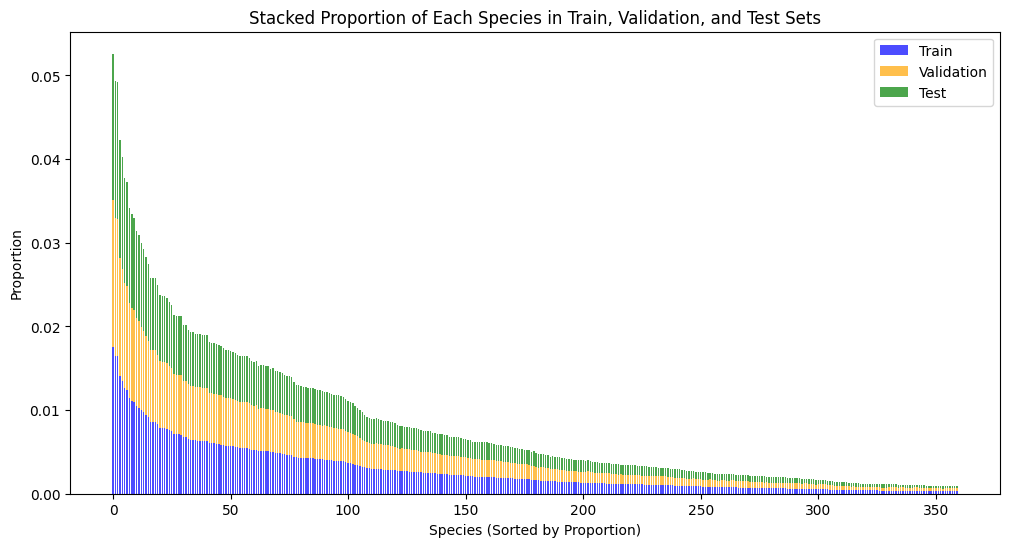

In [13]:
train_props = train_df['en'].value_counts(normalize=True).sort_index()
val_props = val_df['en'].value_counts(normalize=True).sort_index()
test_props = test_df['en'].value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    'Train': train_props,
    'Validation': val_props,
    'Test': test_props
}).fillna(0)  

distribution_df = distribution_df.sort_values(by='Train', ascending=False)

species_indices = np.arange(len(distribution_df)) 
plt.figure(figsize=(12, 6))

plt.bar(species_indices, distribution_df['Train'], width=0.6, label='Train', color='blue', alpha=0.7)
plt.bar(species_indices, distribution_df['Validation'], width=0.6, label='Validation', bottom=distribution_df['Train'], color='orange', alpha=0.7)
plt.bar(species_indices, distribution_df['Test'], width=0.6, label='Test', bottom=distribution_df['Train'] + distribution_df['Validation'], color='green', alpha=0.7)

plt.xlabel('Species (Sorted by Proportion)')
plt.ylabel('Proportion')
plt.title('Stacked Proportion of Each Species in Train, Validation, and Test Sets')
plt.legend()

plt.show()

In [14]:
train_df.to_parquet('../data/cleaned/70_15_15_cleaned_train.parquet', engine='pyarrow', index=False)
test_df.to_parquet('../data/cleaned/70_15_15_cleaned_test.parquet', engine='pyarrow', index=False)
val_df.to_parquet('../data/cleaned/70_15_15_cleaned_val.parquet', engine='pyarrow', index=False)

# Stratified Splitting for K-Fold without Validation

For model performance analysis reasons, we also create splits with a larger train set and without validation set where we intend to use K-Fold Cross Validation.

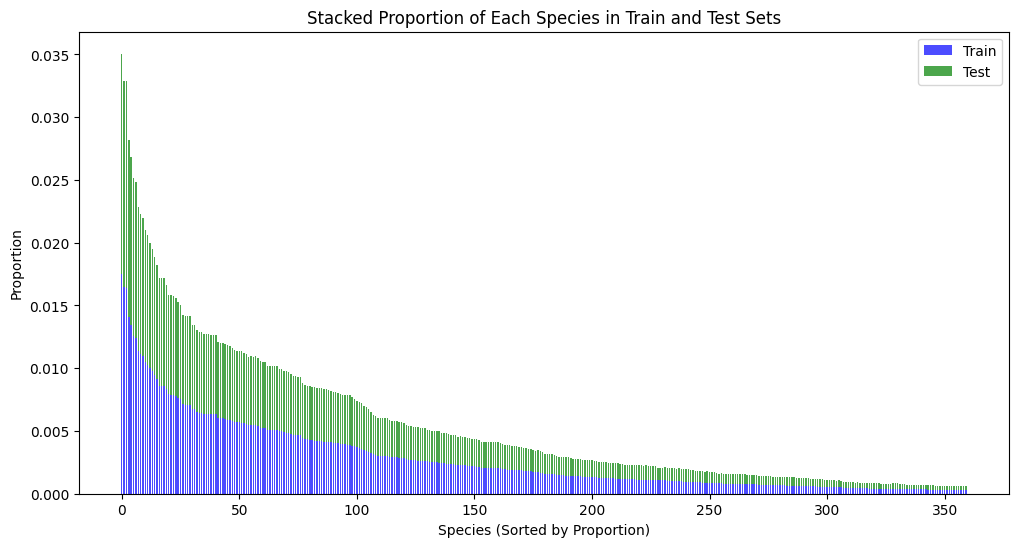

In [15]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['en'], random_state=42)

train_props = train_df['en'].value_counts(normalize=True).sort_index()

test_props = test_df['en'].value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    'Train': train_props,
    'Test': test_props
}).fillna(0)  

distribution_df = distribution_df.sort_values(by='Train', ascending=False)

species_indices = np.arange(len(distribution_df)) 
plt.figure(figsize=(12, 6))

plt.bar(species_indices, distribution_df['Train'], width=0.6, label='Train', color='blue', alpha=0.7)
plt.bar(species_indices, distribution_df['Test'], width=0.6, label='Test', bottom=distribution_df['Train'] , color='green', alpha=0.7)

plt.xlabel('Species (Sorted by Proportion)')
plt.ylabel('Proportion')
plt.title('Stacked Proportion of Each Species in Train and Test Sets')
plt.legend()

plt.show()

In [16]:
train_df.to_parquet('../data/cleaned/80_20_cleaned_train.parquet', engine='pyarrow', index=False)
test_df.to_parquet('../data/cleaned/80_20_cleaned_test.parquet', engine='pyarrow', index=False)